In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image 
pd.options.display.max_columns=15


In [15]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\AAM\Clustering")
seed = 4

In [16]:
df = pd.read_csv(os.getcwd()+r"\Data Files\NVHGearsBLCarrier.csv")

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
df.head()

,SITENAME,PLANTNAME,LINENAME,STATIONNAME,LAPPER_STATION,BACKLASH_STATION,OP110_STN,...,'SFT 1st Mesh Harmonic Coast Side Pos 1 Val (µrad)','Single Flank Tester Spiral Angle Pinion','Single Flank Tester Spiral Angle Ring Gear',M46BPDXX_DISTANCE_D_SEAT_TO_FG,M47BPDXX_DISTANCE_DE_TO_F_SEAT,M48BPDXX_DISTANCE_DE_TO_G_SEAT,PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES
0,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,GBT604077,B,110B,...,3.0684,51.083,25.066,158.5025,142.5115,105.0310,0.06390
1,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,GBT702432,A,110B,...,3.1568,51.083,25.066,158.4980,142.4870,105.0190,0.00880
2,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300B,GBT702432,A,110B,...,3.6532,51.083,25.066,158.4850,142.4860,105.0425,0.01305
3,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300B,GBT604077,A,110A,...,2.0519,51.083,25.066,158.5055,142.4780,105.0230,0.02975
4,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,GBT604077,A,110A,...,0.5989,51.083,25.066,158.4710,142.5160,105.0750,0.05240


In [18]:
df["STATUS_ENC"]=np.where(df["STATUS"]=='A',0,1)

In [19]:
df.groupby("TOPPART")["STATUS_ENC"].agg(["count","sum","mean"])

,count,sum,mean
TOPPART,,,
84686547,7701,76,0.009869
84812882,10714,120,0.011200
84833848,2765,102,0.036890
84833849,31782,196,0.006167
84833850,5314,58,0.010915
84833851,6387,58,0.009081
84833852,190,0,0.000000
84833853,1470,82,0.055782
84833854,35283,201,0.005697


In [20]:
df[["STATIONNAME",
"LAPPER_STATION",
"BACKLASH_STATION",
"OP110_STN",
"OP100_STN","SITENAME"]].groupby(["STATIONNAME",
"LAPPER_STATION",
"BACKLASH_STATION",
"OP110_STN",
"OP100_STN"]).count().reset_index().to_csv("names_mapping_analysis.csv")
#Result: All machines names values are many to many mapping(all to all mapping)

In [22]:
# # import pandas_profiling
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')
# # df.profile_report()

# Fill Rate

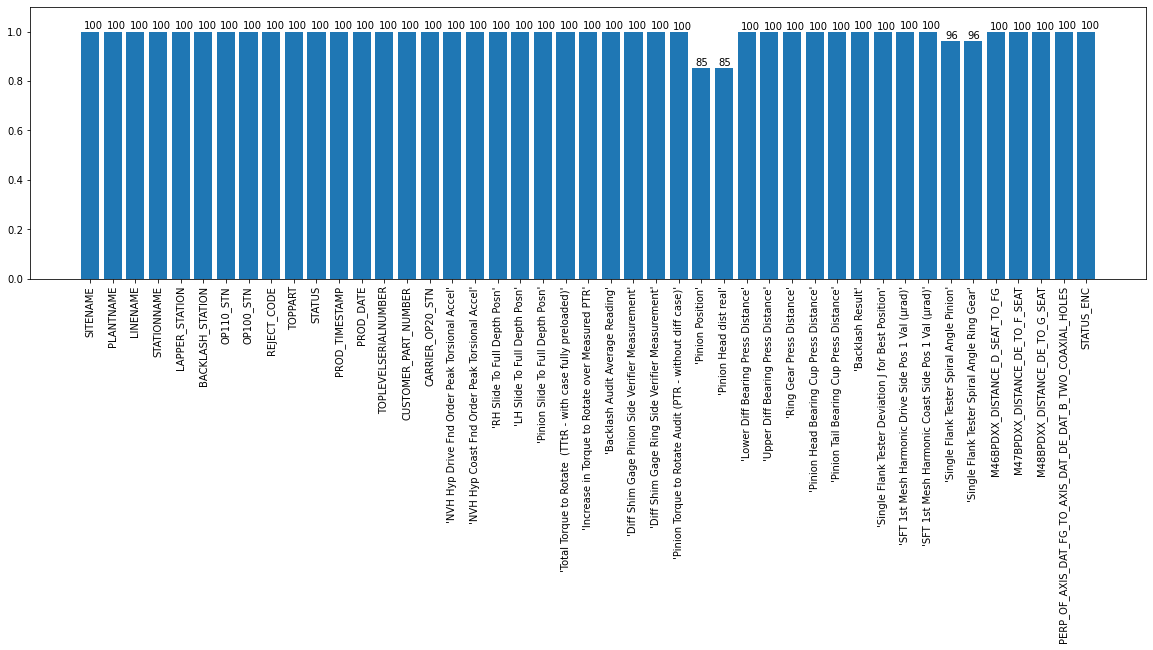

In [23]:
df_fill_rate=df.count()/len(df)
df_fill_rate = df_fill_rate.reset_index()
df_fill_rate.columns = ["COLUMN","FILL_RATE"]

fig = plt.figure(figsize=[20,5])
ax1 = fig.add_subplot(1,1,1)
ax1.bar(x=df_fill_rate["COLUMN"],height=df_fill_rate["FILL_RATE"])

for i, txt in enumerate(df_fill_rate.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_fill_rate.FILL_RATE[i]+0.01)))

plt.xticks(rotation=90)
plt.ylim(0,1.1)
plt.show()


# Missing values treatment
Options:
1) Drop all missing values
2) Treat missing values as N/A (by assigning some outlier value to them). This should create a different cluster for them 
3) Fill median by grouping based on the part number

In [24]:
df["'Pinion Position'"] = df["'Pinion Position'"].fillna(df.groupby('TOPPART')["'Pinion Position'"].transform('median'))
df["'Pinion Head dist real'"] = df["'Pinion Head dist real'"].fillna(df.groupby('TOPPART')["'Pinion Head dist real'"].transform('median'))
df["'Single Flank Tester Spiral Angle Pinion'"] = df["'Single Flank Tester Spiral Angle Pinion'"].fillna(df.groupby(['LAPPER_STATION'])["'Single Flank Tester Spiral Angle Pinion'"].transform('median'))
df["'Single Flank Tester Spiral Angle Ring Gear'"] = df["'Single Flank Tester Spiral Angle Ring Gear'"].fillna(df.groupby(['LAPPER_STATION'])["'Single Flank Tester Spiral Angle Ring Gear'"].transform('median'))

In [25]:
df.shape

(101606, 45)

In [26]:
df.to_csv("C:\\Users\\aman.khatri91425\\Desktop\\HomeCredit\\AAM\\Clustering\\Data Files\\NVHGearsBLCarrier_missing_treated.csv")

In [27]:
df.columns

Index(['SITENAME', 'PLANTNAME', 'LINENAME', 'STATIONNAME', 'LAPPER_STATION',
       'BACKLASH_STATION', 'OP110_STN', 'OP100_STN', 'REJECT_CODE', 'TOPPART',
       'STATUS', 'PROD_TIMESTAMP', 'PROD_DATE', 'TOPLEVELSERIALNUMBER',
       'CUSTOMER_PART_NUMBER', 'CARRIER_OP20_STN',
       ''NVH Hyp Drive Fnd Order Peak Torsional Accel'',
       ''NVH Hyp Coast Fnd Order Peak Torsional Accel'',
       ''RH Slide To Full Depth Posn'', ''LH Slide To Full Depth Posn'',
       ''Pinion Slide To Full Depth Posn'',
       ''Total Torque to Rotate  (TTtR - with case fully preloaded)'',
       ''Increase in Torque to Rotate over Measured PTR'',
       ''Backlash Audit Average Reading'',
       ''Diff Shim Gage Pinion Side Verifier Measurement'',
       ''Diff Shim Gage Ring Side Verifier Measurement'',
       ''Pinion Torque to Rotate Audit (PTR - without diff case)'',
       ''Pinion Position'', ''Pinion Head dist real'',
       ''Lower Diff Bearing Press Distance'',
       ''Upper Diff Bearing Pr

In [32]:
df.dropna(inplace = True)
print(df.shape)
df.reset_index(inplace = True)

(101335, 45)


# Start Clustering
https://machinelearningmastery.com/clustering-algorithms-with-python/

https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html

Best clustering algorithm to be chosen based on differentiation it is able to create in rejects(Something on line of IV)

In [39]:
df_model = df[df["TOPPART"]==84833854]

In [40]:
features_carrier = ['M46BPDXX_DISTANCE_D_SEAT_TO_FG','M47BPDXX_DISTANCE_DE_TO_F_SEAT','M48BPDXX_DISTANCE_DE_TO_G_SEAT',
                    'PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES']
features_gear = ["'Backlash Result'","'Single Flank Tester Deviation J for Best Position'",
                 "'SFT 1st Mesh Harmonic Drive Side Pos 1 Val (µrad)'","'SFT 1st Mesh Harmonic Coast Side Pos 1 Val (µrad)'",
                 "'Single Flank Tester Spiral Angle Pinion'","'Single Flank Tester Spiral Angle Ring Gear'"]
features_backlash = ['M46BPDXX_DISTANCE_D_SEAT_TO_FG','M47BPDXX_DISTANCE_DE_TO_F_SEAT','M48BPDXX_DISTANCE_DE_TO_G_SEAT',
                    'PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES',"'Backlash Result'","'Single Flank Tester Deviation J for Best Position'",
                 "'SFT 1st Mesh Harmonic Drive Side Pos 1 Val (µrad)'","'SFT 1st Mesh Harmonic Coast Side Pos 1 Val (µrad)'",
                 "'Single Flank Tester Spiral Angle Pinion'","'Single Flank Tester Spiral Angle Ring Gear'",
                "'Backlash Audit Average Reading'","'Diff Shim Gage Pinion Side Verifier Measurement'",
                "'Diff Shim Gage Ring Side Verifier Measurement'","'Pinion Torque to Rotate Audit (PTR - without diff case)'",
                "'Pinion Position'","'Pinion Head dist real'","'Lower Diff Bearing Press Distance'",
                "'Upper Diff Bearing Press Distance'","'Ring Gear Press Distance'","'Pinion Head Bearing Cup Press Distance'",
                "'Pinion Tail Bearing Cup Press Distance'"]

## Create dimensions for PCA and TSNE visualisation

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#PCA Dimensions
for name in ["carrier","gear","backlash"]:
    x = df_model.loc[:, eval("features_"+name)].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    df_model[['PC1_'+name, 'PC2_'+name]] = principalComponents
            

#TSNE dimensions
for name in ["carrier","gear","backlash"]:
    tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(df_model[eval("features_"+name)])
    df_model[["TSNE1_"+name,"TSNE2_"+name]] = tsne_results

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to b

In [316]:
df_model1 = df_model

## Create IV,gini function based on Status and clusters

In [159]:
def iv_df(df=None,target=None, cluster_num=None):
    data=df.copy()
    data['target0'] = np.where(data[target]=='A',1,0)
    data['target1'] = np.where(data[target]=='A',0,1)
    data['bucket'] = data[cluster_num]
    grouped = data.groupby('bucket', as_index = False)
    liftstable = pd.DataFrame()
    liftstable['total']   = grouped.count()[target]
    liftstable['bads']   = round(grouped.sum()['target1'])
    liftstable['goods'] = round(grouped.sum()['target0'])
    liftstable['bad_rate'] = liftstable['bads']/liftstable['total']
    
    liftstable['%base'] = (liftstable.total / data['target1'].count())
    liftstable = liftstable.sort_index(ascending=True).reset_index(drop = False)
    liftstable.rename(columns = {'index':"CLUSTER"},inplace = True)
    liftstable['cum%_base'] = (liftstable.total / data['target1'].count()).cumsum()
    liftstable['%bads'] = (liftstable['bads'] / data['target1'].sum())
    liftstable['%goods'] = (liftstable['goods'] / data['target0'].sum())
    liftstable['cum%_bads']=(liftstable['bads'] / data['target1'].sum()).cumsum()
    liftstable['cum%_goods']=(liftstable['bads'] / data['target0'].sum()).cumsum()
    liftstable['woe'] = np.log(liftstable['%goods'] / liftstable['%bads'])
    liftstable = liftstable.replace({'woe': {np.inf: 0, -np.inf: 0}})
    liftstable['IV'] = (liftstable['%goods'] - liftstable['%bads']) * liftstable["woe"]
    
    #Formating
    liftstable['%base']= liftstable['%base'].apply('{0:.2%}'.format)
    liftstable['%bads']= liftstable['%bads'].apply('{0:.2%}'.format)
    liftstable['%goods']= liftstable['%goods'].apply('{0:.2%}'.format)
    liftstable['cum%_bads']= liftstable['cum%_bads'].apply('{0:.2%}'.format)
    liftstable['cum%_goods']= liftstable['cum%_goods'].apply('{0:.2%}'.format)
    liftstable['cum%_base'] = liftstable['cum%_base'].apply('{0:.2%}'.format)
#     liftstable['bad_rate'] = liftstable['bad_rate'].apply('{0:.2%}'.format)

    pd.set_option('display.max_columns', 10)
    return(liftstable)

In [154]:
from sklearn.metrics import roc_auc_score

def gini_val(data=None,status=None,score=None):
    return (2*roc_auc_score(data[status],data[score])-1)

def iv_val(data=None):
    data


# K-Means Clustering - Carrier Chars

In [429]:
# k-means clustering
name = 'carrier'
df_model = df_model1.copy()
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
from scipy.spatial.distance import cdist 


x = df_model.loc[:, eval("features_"+name)].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    model = KMeans(n_clusters=k, random_state=5)
    model.fit(x)     
    distortions.append(sum(np.min(cdist(x, model.cluster_centers_, 
                      'euclidean'),axis=1)) / x.shape[0]) 
    inertias.append(model.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(x, model.cluster_centers_, 
                 'euclidean'),axis=1)) / x.shape[0] 
    mapping2[k] = model.inertia_ 



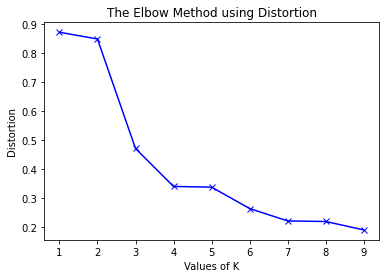

In [430]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

### Fit model with required n

In [431]:
# k-means clustering
df_model = df_model1.copy()

x = df_model.loc[:, eval("features_"+name)].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# define the model
model = KMeans(n_clusters=4,random_state=5)
# fit the model
model.fit(x)
# assign a cluster to each example
yhat = model.predict(x)
df_model["CLUSTER"] = yhat
# retrieve unique clusters


In [432]:
df_model_summ=iv_df(df=df_model,target="STATUS", cluster_num="CLUSTER")
df_model=df_model.merge(df_model_summ[["CLUSTER","bad_rate"]],on='CLUSTER')

In [433]:
# df_model.drop(columns = ["bad_rate_x","bad_rate_y"],inplace = True)

In [434]:
print("GINI Value: ", '{0:.2%}'.format(2*roc_auc_score(df_model["STATUS"],df_model["bad_rate"])-1))
print("IV Value: ", '{0:.2}'.format(np.sum(df_model_summ["IV"])))
df_model_summ

GINI Value:  4.59%
IV Value:  0.0086


,CLUSTER,total,bads,goods,bad_rate,...,%goods,cum%_bads,cum%_goods,woe,IV
0,0,10758,57,10701,0.005298,...,30.59%,28.36%,0.16%,0.075843,0.001695
1,1,10902,71,10831,0.006513,...,30.96%,63.68%,0.37%,-0.131710,0.005741
2,2,9,0,9,0.000000,...,0.03%,63.68%,0.37%,0.000000,0.000000
3,3,13511,73,13438,0.005403,...,38.42%,100.00%,0.57%,0.056184,0.001179


### Create Visualisation

In [435]:
def rand_jitter(arr):
    stdev = .001*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

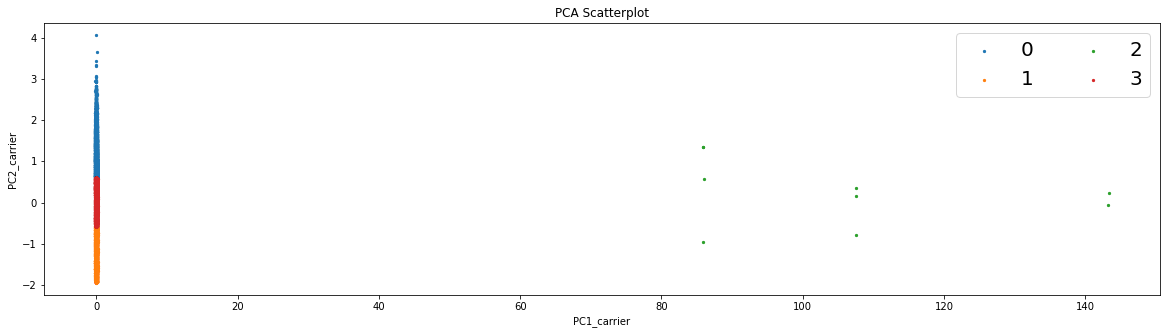

In [436]:
clusters = unique(yhat)

#using PCA
pyplot.figure(figsize = [20,5])

ledgend=[]

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(df_model["CLUSTER"] == cluster)
    # create scatter of these samples
    ledgend.append(pyplot.scatter(rand_jitter(df_model.loc[row_ix,'PC1_'+name]), rand_jitter(df_model.loc[row_ix,'PC2_'+name]),s=5))
# show the plot


plt.legend(ledgend,
           clusters,
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=20)

pyplot.title("PCA Scatterplot")
pyplot.xlabel('PC1_'+name)
pyplot.ylabel('PC2_'+name)
pyplot.show()




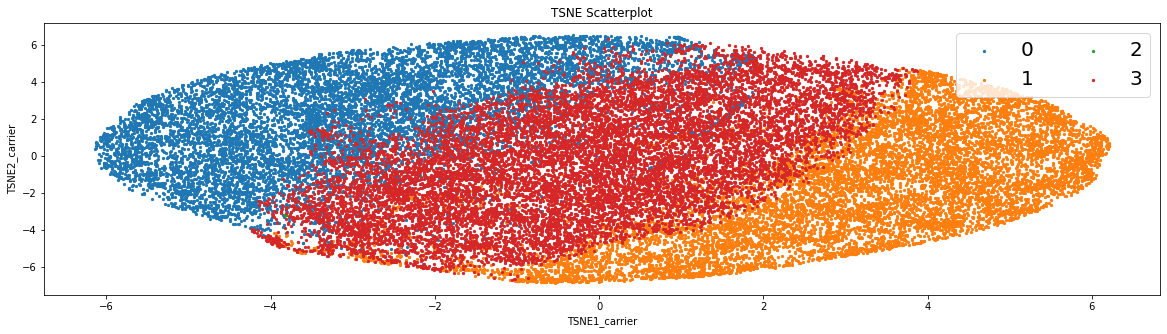

In [437]:
clusters = unique(yhat)

#using TSNE
pyplot.figure(figsize = [20,5])

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(df_model["CLUSTER"] == cluster)
    # create scatter of these samples
    ledgend.append(pyplot.scatter(rand_jitter(df_model.loc[row_ix,'TSNE1_'+name]), rand_jitter(df_model.loc[row_ix,'TSNE2_'+name]),s=5))
# show the plot


plt.legend(ledgend,
           clusters,
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=20)
# show the plot
pyplot.title("TSNE Scatterplot")
pyplot.xlabel('TSNE1_'+name)
pyplot.ylabel('TSNE2_'+name)
pyplot.show()

# Supervised clustering with Decision Tree: Carrier Chars

In [438]:
y_column = 'STATUS'

In [439]:
df_model = df_model1.copy()

In [440]:
clf = DecisionTreeClassifier(random_state=0, max_depth=2, min_samples_leaf = 500)
clf.fit(df_model[eval("features_"+name)], df_model[y_column])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=500, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [441]:
df_model["PRED_PROB"]=clf.predict_proba(df_model[eval("features_"+name)])[:,1]

In [442]:
dict = {"PRED_PROB":[],"CLUSTER":[]}
list = df_model.PRED_PROB.unique()
for x in range(len(list)):
        dict["PRED_PROB"].append(list[x])
        dict["CLUSTER"].append(x)
df_model = df_model.merge(pd.DataFrame(dict),on = 'PRED_PROB')

In [443]:
df_model

,index,SITENAME,PLANTNAME,LINENAME,STATIONNAME,...,TSNE2_carrier,TSNE1_gear,TSNE2_gear,PRED_PROB,CLUSTER
0,0,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,3.657539,1.642243,8.189946,0.005892,0
1,12,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,4.546483,1.106648,6.456264,0.005892,0
2,17,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,5.730440,3.609601,-1.968914,0.005892,0
3,22,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,1.743676,3.500113,6.223699,0.005892,0
4,69,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,2.968501,-5.354578,2.201994,0.005892,0
...,...,...,...,...,...,...,...,...,...,...,...
35175,5627,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300B,...,-3.194888,4.023656,-2.314836,0.002468,3
35176,19176,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,-3.195973,-0.139283,3.745013,0.002468,3
35177,19666,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,-3.194239,-3.136131,0.547263,0.002468,3
35178,19667,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,-3.194240,-3.139166,0.665625,0.002468,3


In [444]:
df_model_summ=iv_df(df=df_model,target="STATUS", cluster_num="CLUSTER")

In [445]:
print("GINI Value: ", '{0:.2%}'.format(2*roc_auc_score(df_model["STATUS"],df_model["PRED_PROB"])-1))
print("IV Value: ", '{0:.2}'.format(np.sum(df_model_summ["IV"])))
df_model_summ

GINI Value:  14.50%
IV Value:  0.15


,CLUSTER,total,bads,goods,bad_rate,...,%goods,cum%_bads,cum%_goods,woe,IV
0,0,27157,160,26997,0.005892,...,77.18%,79.60%,0.46%,-0.030891,0.000748
1,1,520,12,508,0.023077,...,1.45%,85.57%,0.49%,-1.413623,0.063865
2,2,1830,15,1815,0.008197,...,5.19%,93.03%,0.53%,-0.363408,0.008263
3,3,5673,14,5659,0.002468,...,16.18%,100.00%,0.57%,0.842747,0.077643


### Create Visualisation

In [446]:
def rand_jitter(arr):
    stdev = .001*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

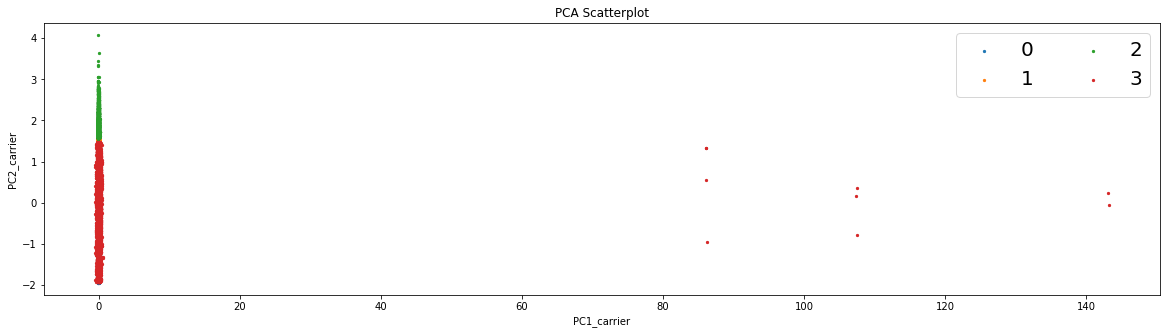

In [447]:
clusters = unique(df_model["CLUSTER"])

#using PCA
pyplot.figure(figsize = [20,5])

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(df_model["CLUSTER"] == cluster)
    # create scatter of these samples
    ledgend.append(pyplot.scatter(rand_jitter(df_model.loc[row_ix,'PC1_'+name]), rand_jitter(df_model.loc[row_ix,'PC2_'+name]),s=5))
# show the plot


plt.legend(ledgend,
           clusters,
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=20)
pyplot.title("PCA Scatterplot")
pyplot.xlabel('PC1_'+name)
pyplot.ylabel('PC2_'+name)
pyplot.show()




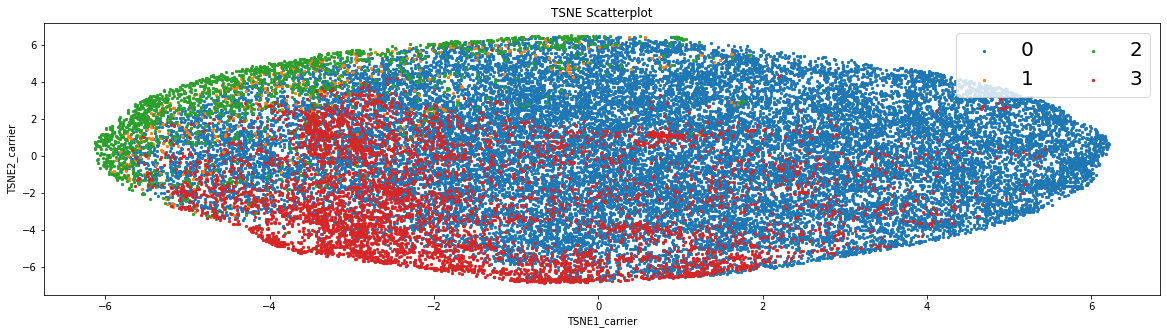

In [448]:
clusters = unique(df_model["CLUSTER"])

#using TSNE
pyplot.figure(figsize = [20,5])

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(df_model["CLUSTER"] == cluster)
    # create scatter of these samples
    ledgend.append(pyplot.scatter(rand_jitter(df_model.loc[row_ix,'TSNE1_'+name]), rand_jitter(df_model.loc[row_ix,'TSNE2_'+name]),s=5))
# show the plot


plt.legend(ledgend,
           clusters,
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=20)
pyplot.title("TSNE Scatterplot")
pyplot.xlabel('TSNE1_'+name)
pyplot.ylabel('TSNE2_'+name)
pyplot.show()

In [449]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=eval("features_"+name),  
                                class_names=y_column)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph ---Not working due to graphViz
#Image(graph.create_png())

In [450]:
print(dot_data)
#copy this to editor window on http://www.webgraphviz.com/ to create chart

digraph Tree {
node [shape=box] ;
0 [label="PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES <= 0.076\ngini = 0.011\nsamples = 35180\nvalue = [34979, 201]\nclass = S"] ;
1 [label="M46BPDXX_DISTANCE_D_SEAT_TO_FG <= 158.482\ngini = 0.011\nsamples = 32830\nvalue = [32656, 174]\nclass = S"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.005\nsamples = 5673\nvalue = [5659, 14]\nclass = S"] ;
1 -> 2 ;
3 [label="gini = 0.012\nsamples = 27157\nvalue = [26997, 160]\nclass = S"] ;
1 -> 3 ;
4 [label="PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES <= 0.078\ngini = 0.023\nsamples = 2350\nvalue = [2323, 27]\nclass = S"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.045\nsamples = 520\nvalue = [508, 12]\nclass = S"] ;
4 -> 5 ;
6 [label="gini = 0.016\nsamples = 1830\nvalue = [1815, 15]\nclass = S"] ;
4 -> 6 ;
}


In [451]:
# # Create PDF
# graph.write_pdf("decision_tree.pdf")

# # Create PNG
# graph.write_png("decision_tree.png")

# K-Means Clustering - Gear

In [452]:
# k-means clustering
name = 'gear'
df_model = df_model1.copy()
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
from scipy.spatial.distance import cdist 


x = df_model.loc[:, eval("features_"+name)].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    model = KMeans(n_clusters=k, random_state=5)
    model.fit(x)     
    distortions.append(sum(np.min(cdist(x, model.cluster_centers_, 
                      'euclidean'),axis=1)) / x.shape[0]) 
    inertias.append(model.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(x, model.cluster_centers_, 
                 'euclidean'),axis=1)) / x.shape[0] 
    mapping2[k] = model.inertia_ 



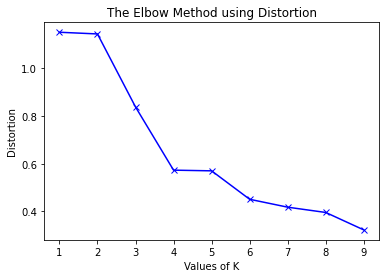

In [453]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

### Fit model with required n

In [454]:
# k-means clustering
df_model = df_model1.copy()

x = df_model.loc[:, eval("features_"+name)].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# define the model
model = KMeans(n_clusters=4,random_state=5)
# fit the model
model.fit(x)
# assign a cluster to each example
yhat = model.predict(x)
df_model["CLUSTER"] = yhat
# retrieve unique clusters


In [455]:
df_model_summ=iv_df(df=df_model,target="STATUS", cluster_num="CLUSTER")
df_model=df_model.merge(df_model_summ[["CLUSTER","bad_rate"]],on='CLUSTER')

In [456]:
# df_model.drop(columns = ["bad_rate_x","bad_rate_y"],inplace = True)

In [457]:
print("GINI Value: ", '{0:.2%}'.format(2*roc_auc_score(df_model["STATUS"],df_model["bad_rate"])-1))
print("IV Value: ", '{0:.2}'.format(np.sum(df_model_summ["IV"])))
df_model_summ

GINI Value:  5.17%
IV Value:  0.032


,CLUSTER,total,bads,goods,bad_rate,...,%goods,cum%_bads,cum%_goods,woe,IV
0,0,14859,90,14769,0.006057,...,42.22%,44.78%,0.26%,-0.058722,0.001500
1,1,16284,98,16186,0.006018,...,46.27%,93.53%,0.54%,-0.052264,0.001298
2,2,1,0,1,0.000000,...,0.00%,93.53%,0.54%,0.000000,0.000000
3,3,4036,13,4023,0.003221,...,11.50%,100.00%,0.57%,0.575636,0.028975


### Create Visualisation

In [458]:
def rand_jitter(arr):
    stdev = .001*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

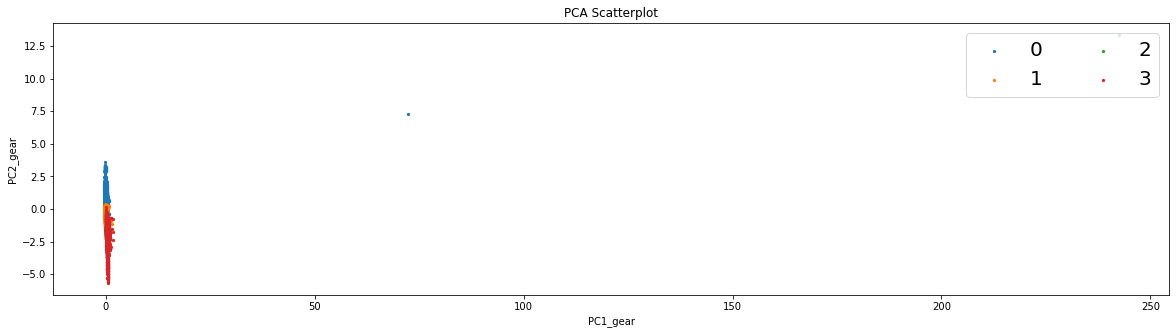

In [459]:
clusters = unique(yhat)

#using PCA
pyplot.figure(figsize = [20,5])

ledgend=[]

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(df_model["CLUSTER"] == cluster)
    # create scatter of these samples
    ledgend.append(pyplot.scatter(rand_jitter(df_model.loc[row_ix,'PC1_'+name]), rand_jitter(df_model.loc[row_ix,'PC2_'+name]),s=5))
# show the plot


plt.legend(ledgend,
           clusters,
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=20)

pyplot.title("PCA Scatterplot")
pyplot.xlabel('PC1_'+name)
pyplot.ylabel('PC2_'+name)
pyplot.show()




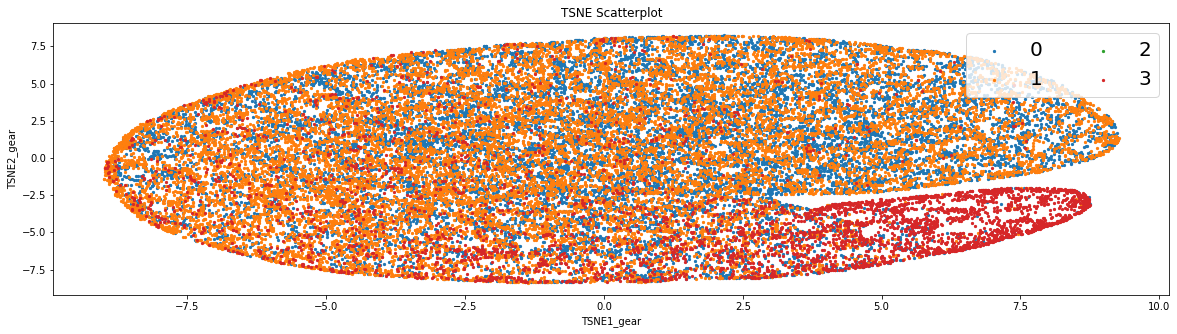

In [460]:
clusters = unique(yhat)

#using TSNE
pyplot.figure(figsize = [20,5])

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(df_model["CLUSTER"] == cluster)
    # create scatter of these samples
    ledgend.append(pyplot.scatter(rand_jitter(df_model.loc[row_ix,'TSNE1_'+name]), rand_jitter(df_model.loc[row_ix,'TSNE2_'+name]),s=5))
# show the plot


plt.legend(ledgend,
           clusters,
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=20)
# show the plot
pyplot.title("TSNE Scatterplot")
pyplot.xlabel('TSNE1_'+name)
pyplot.ylabel('TSNE2_'+name)
pyplot.show()

# Supervised clustering with Decision Tree: Gear Chars

In [461]:
y_column = 'STATUS'

In [462]:
df_model = df_model1.copy()

In [463]:
clf = DecisionTreeClassifier(random_state=0, max_depth=2, min_samples_leaf = 500)
clf.fit(df_model[eval("features_"+name)], df_model[y_column])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=500, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [464]:
df_model["PRED_PROB"]=clf.predict_proba(df_model[eval("features_"+name)])[:,1]

In [465]:
dict = {"PRED_PROB":[],"CLUSTER":[]}
list = df_model.PRED_PROB.unique()
for x in range(len(list)):
        dict["PRED_PROB"].append(list[x])
        dict["CLUSTER"].append(x)
df_model = df_model.merge(pd.DataFrame(dict),on = 'PRED_PROB')

In [466]:
df_model

,index,SITENAME,PLANTNAME,LINENAME,STATIONNAME,...,TSNE2_carrier,TSNE1_gear,TSNE2_gear,PRED_PROB,CLUSTER
0,0,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,3.657539,1.642243,8.189946,0.006655,0
1,12,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,4.546483,1.106648,6.456264,0.006655,0
2,17,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,5.730440,3.609601,-1.968914,0.006655,0
3,22,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,1.743676,3.500113,6.223699,0.006655,0
4,69,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,2.968501,-5.354578,2.201994,0.006655,0
...,...,...,...,...,...,...,...,...,...,...,...
35175,86686,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,-5.358622,1.663206,-4.501288,0.005636,3
35176,86779,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300B,...,0.129169,3.813461,-5.083893,0.005636,3
35177,13595,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300B,...,-4.644938,1.163827,0.427172,0.005636,3
35178,36638,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,-4.862616,-1.013963,-5.180915,0.005636,3


In [467]:
df_model_summ=iv_df(df=df_model,target="STATUS", cluster_num="CLUSTER")

In [468]:
print("GINI Value: ", '{0:.2%}'.format(2*roc_auc_score(df_model["STATUS"],df_model["PRED_PROB"])-1))
print("IV Value: ", '{0:.2}'.format(np.sum(df_model_summ["IV"])))
df_model_summ

GINI Value:  13.24%
IV Value:  0.15


,CLUSTER,total,bads,goods,bad_rate,...,%goods,cum%_bads,cum%_goods,woe,IV
0,0,25847,172,25675,0.006655,...,73.40%,85.57%,0.49%,-0.153420,0.018673
1,1,4852,11,4841,0.002267,...,13.84%,91.04%,0.52%,0.927783,0.077628
2,2,1642,2,1640,0.001218,...,4.69%,92.04%,0.53%,1.550106,0.057253
3,3,2839,16,2823,0.005636,...,8.07%,100.00%,0.57%,0.013768,0.000015


### Create Visualisation

In [469]:
def rand_jitter(arr):
    stdev = .001*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

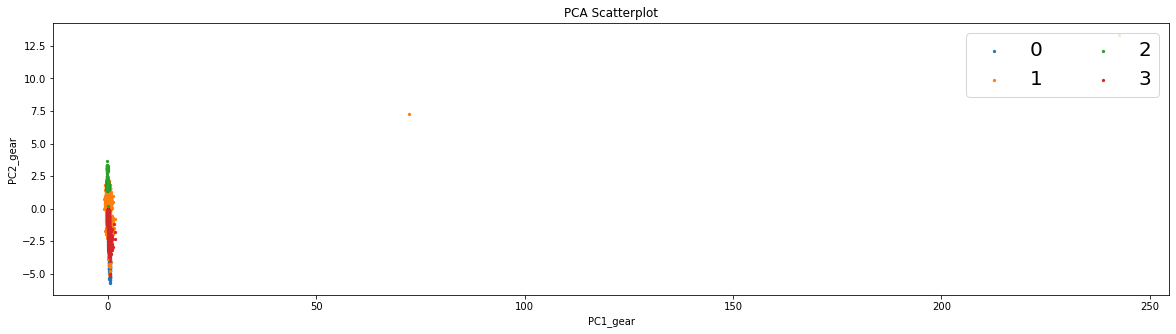

In [470]:
clusters = unique(df_model["CLUSTER"])

#using PCA
pyplot.figure(figsize = [20,5])

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(df_model["CLUSTER"] == cluster)
    # create scatter of these samples
    ledgend.append(pyplot.scatter(rand_jitter(df_model.loc[row_ix,'PC1_'+name]), rand_jitter(df_model.loc[row_ix,'PC2_'+name]),s=5))
# show the plot


plt.legend(ledgend,
           clusters,
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=20)
pyplot.title("PCA Scatterplot")
pyplot.xlabel('PC1_'+name)
pyplot.ylabel('PC2_'+name)
pyplot.show()




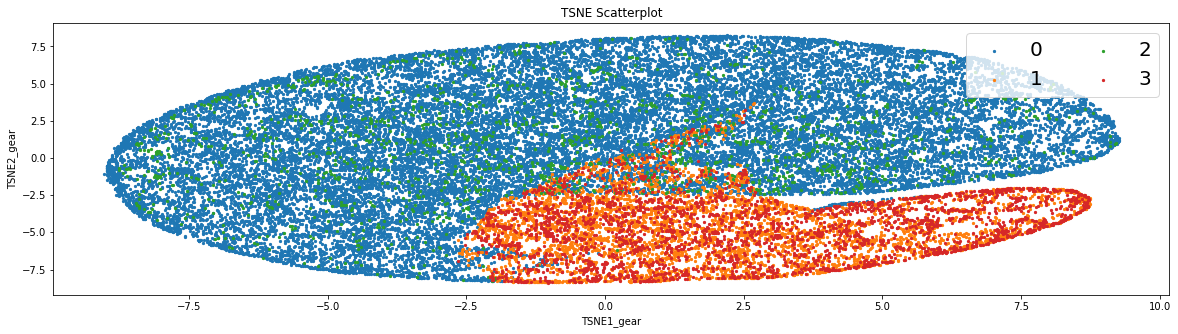

In [471]:
clusters = unique(df_model["CLUSTER"])

#using TSNE
pyplot.figure(figsize = [20,5])

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(df_model["CLUSTER"] == cluster)
    # create scatter of these samples
    ledgend.append(pyplot.scatter(rand_jitter(df_model.loc[row_ix,'TSNE1_'+name]), rand_jitter(df_model.loc[row_ix,'TSNE2_'+name]),s=5))
# show the plot


plt.legend(ledgend,
           clusters,
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=20)
pyplot.title("TSNE Scatterplot")
pyplot.xlabel('TSNE1_'+name)
pyplot.ylabel('TSNE2_'+name)
pyplot.show()

In [472]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=eval("features_"+name),  
                                class_names=y_column)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph ---Not working due to graphViz
#Image(graph.create_png())

In [473]:
print(dot_data)
#copy this to editor window on http://www.webgraphviz.com/ to create chart

digraph Tree {
node [shape=box] ;
0 [label="'SFT 1st Mesh Harmonic Coast Side Pos 1 Val (µrad)' <= 4.373\ngini = 0.011\nsamples = 35180\nvalue = [34979, 201]\nclass = S"] ;
1 [label="'Single Flank Tester Deviation J for Best Position' <= -0.169\ngini = 0.013\nsamples = 27489\nvalue = [27315, 174]\nclass = S"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.002\nsamples = 1642\nvalue = [1640, 2]\nclass = S"] ;
1 -> 2 ;
3 [label="gini = 0.013\nsamples = 25847\nvalue = [25675, 172]\nclass = S"] ;
1 -> 3 ;
4 [label="'Single Flank Tester Deviation J for Best Position' <= 0.085\ngini = 0.007\nsamples = 7691\nvalue = [7664, 27]\nclass = S"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.005\nsamples = 4852\nvalue = [4841, 11]\nclass = S"] ;
4 -> 5 ;
6 [label="gini = 0.011\nsamples = 2839\nvalue = [2823, 16]\nclass = S"] ;
4 -> 6 ;
}


In [474]:
# # Create PDF
# graph.write_pdf("decision_tree.pdf")

# # Create PNG
# graph.write_png("decision_tree.png")

# K-Means Clustering - Backlash Chars

In [475]:
# k-means clustering
name = 'backlash'
df_model = df_model1.copy()
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
from scipy.spatial.distance import cdist 


x = df_model.loc[:, eval("features_"+name)].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    #Building and fitting the model 
    model = KMeans(n_clusters=k, random_state=5)
    model.fit(x)     
    distortions.append(sum(np.min(cdist(x, model.cluster_centers_, 
                      'euclidean'),axis=1)) / x.shape[0]) 
    inertias.append(model.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(x, model.cluster_centers_, 
                 'euclidean'),axis=1)) / x.shape[0] 
    mapping2[k] = model.inertia_ 



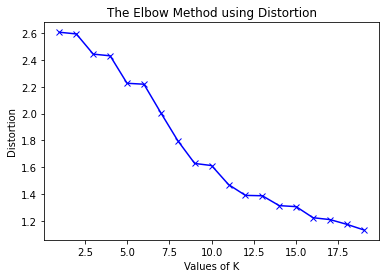

In [476]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

### Fit model with required n

In [477]:
# k-means clustering
df_model = df_model1.copy()

x = df_model.loc[:, eval("features_"+name)].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# define the model
model = KMeans(n_clusters=12,random_state=5)
# fit the model
model.fit(x)
# assign a cluster to each example
yhat = model.predict(x)
df_model["CLUSTER"] = yhat
# retrieve unique clusters


In [478]:
df_model_summ=iv_df(df=df_model,target="STATUS", cluster_num="CLUSTER")
df_model=df_model.merge(df_model_summ[["CLUSTER","bad_rate"]],on='CLUSTER')

In [479]:
# df_model.drop(columns = ["bad_rate_x","bad_rate_y"],inplace = True)

In [480]:
print("GINI Value: ", '{0:.2%}'.format(2*roc_auc_score(df_model["STATUS"],df_model["bad_rate"])-1))
print("IV Value: ", '{0:.2}'.format(np.sum(df_model_summ["IV"])))
df_model_summ

GINI Value:  16.05%
IV Value:  0.09


,CLUSTER,total,bads,goods,bad_rate,...,%goods,cum%_bads,cum%_goods,woe,IV
0,0,311,0,311,0.000000,...,0.89%,0.00%,0.00%,0.000000,0.000000
1,1,8836,63,8773,0.007130,...,25.08%,31.34%,0.18%,-0.222899,0.013959
2,2,3,0,3,0.000000,...,0.01%,31.34%,0.18%,0.000000,0.000000
3,3,9,0,9,0.000000,...,0.03%,31.34%,0.18%,0.000000,0.000000
4,4,1071,5,1066,0.004669,...,3.05%,33.83%,0.19%,0.203032,0.001137
5,5,8177,31,8146,0.003791,...,23.29%,49.25%,0.28%,0.412097,0.032413
6,6,3616,12,3604,0.003319,...,10.30%,55.22%,0.32%,0.545695,0.023646
7,7,5,0,5,0.000000,...,0.01%,55.22%,0.32%,0.000000,0.000000
8,8,1,0,1,0.000000,...,0.00%,55.22%,0.32%,0.000000,0.000000
9,9,1710,9,1701,0.005263,...,4.86%,59.70%,0.34%,0.082549,0.000318


### Create Visualisation

In [481]:
def rand_jitter(arr):
    stdev = .001*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

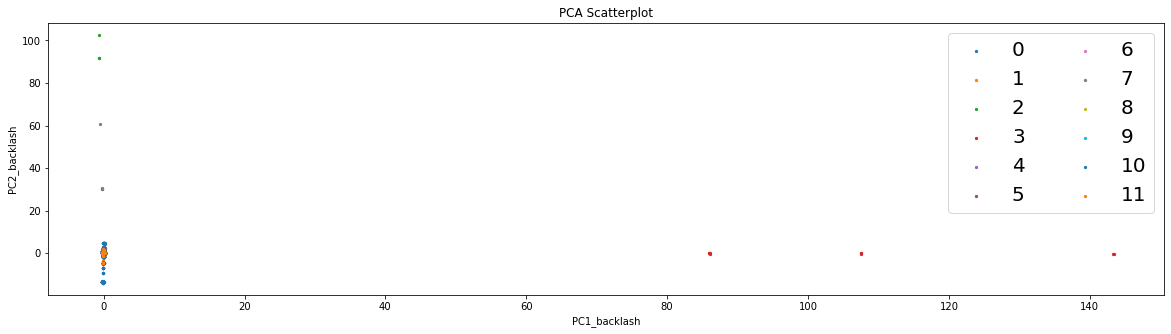

In [482]:
clusters = unique(yhat)

#using PCA
pyplot.figure(figsize = [20,5])

ledgend=[]

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(df_model["CLUSTER"] == cluster)
    # create scatter of these samples
    ledgend.append(pyplot.scatter(rand_jitter(df_model.loc[row_ix,'PC1_'+name]), rand_jitter(df_model.loc[row_ix,'PC2_'+name]),s=5))
# show the plot


plt.legend(ledgend,
           clusters,
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=20)

pyplot.title("PCA Scatterplot")
pyplot.xlabel('PC1_'+name)
pyplot.ylabel('PC2_'+name)
pyplot.show()




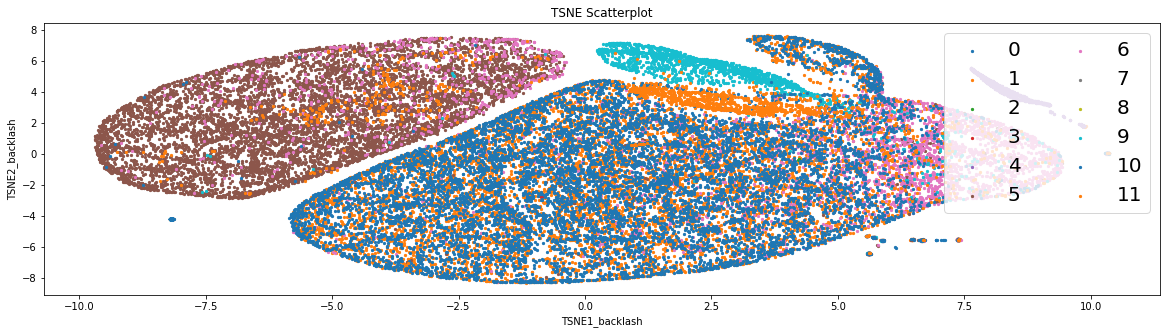

In [483]:
clusters = unique(yhat)

#using TSNE
pyplot.figure(figsize = [20,5])

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(df_model["CLUSTER"] == cluster)
    # create scatter of these samples
    ledgend.append(pyplot.scatter(rand_jitter(df_model.loc[row_ix,'TSNE1_'+name]), rand_jitter(df_model.loc[row_ix,'TSNE2_'+name]),s=5))
# show the plot


plt.legend(ledgend,
           clusters,
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=20)
# show the plot
pyplot.title("TSNE Scatterplot")
pyplot.xlabel('TSNE1_'+name)
pyplot.ylabel('TSNE2_'+name)
pyplot.show()

# Supervised clustering with Decision Tree: Carrier Chars

In [484]:
y_column = 'STATUS'

In [485]:
df_model = df_model1.copy()

In [486]:
clf = DecisionTreeClassifier(random_state=0, max_depth=2, min_samples_leaf = 500)
clf.fit(df_model[eval("features_"+name)], df_model[y_column])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=500, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [487]:
df_model["PRED_PROB"]=clf.predict_proba(df_model[eval("features_"+name)])[:,1]

In [488]:
dict = {"PRED_PROB":[],"CLUSTER":[]}
list = df_model.PRED_PROB.unique()
for x in range(len(list)):
        dict["PRED_PROB"].append(list[x])
        dict["CLUSTER"].append(x)
df_model = df_model.merge(pd.DataFrame(dict),on = 'PRED_PROB')

In [489]:
df_model

,index,SITENAME,PLANTNAME,LINENAME,STATIONNAME,...,TSNE2_carrier,TSNE1_gear,TSNE2_gear,PRED_PROB,CLUSTER
0,0,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,3.657539,1.642243,8.189946,0.006666,0
1,12,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,4.546483,1.106648,6.456264,0.006666,0
2,17,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,5.730440,3.609601,-1.968914,0.006666,0
3,22,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,1.743676,3.500113,6.223699,0.006666,0
4,69,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,2.968501,-5.354578,2.201994,0.006666,0
...,...,...,...,...,...,...,...,...,...,...,...
35175,21778,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300B,...,-5.482732,-3.058788,0.425419,0.037849,2
35176,30835,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,-1.580762,6.583506,0.229991,0.037849,2
35177,30836,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300A,...,-1.580874,-6.791950,-4.201406,0.037849,2
35178,45903,GMCFULL,Full Frame BU (Plant 5),NVH A&B,OP300B,...,-5.612269,3.502726,-0.794601,0.037849,2


In [490]:
df_model_summ=iv_df(df=df_model,target="STATUS", cluster_num="CLUSTER")

In [491]:
print("GINI Value: ", '{0:.2%}'.format(2*roc_auc_score(df_model["STATUS"],df_model["PRED_PROB"])-1))
print("IV Value: ", '{0:.2}'.format(np.sum(df_model_summ["IV"])))
df_model_summ

GINI Value:  24.96%
IV Value:  0.38


,CLUSTER,total,bads,goods,bad_rate,...,%goods,cum%_bads,cum%_goods,woe,IV
0,0,24154,161,23993,0.006666,...,68.59%,80.10%,0.46%,-0.155085,0.017846
1,1,10524,21,10503,0.001995,...,30.03%,90.55%,0.52%,1.055696,0.206693
2,2,502,19,483,0.037849,...,1.38%,100.00%,0.57%,-1.923621,0.155273


### Create Visualisation

In [492]:
def rand_jitter(arr):
    stdev = .001*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

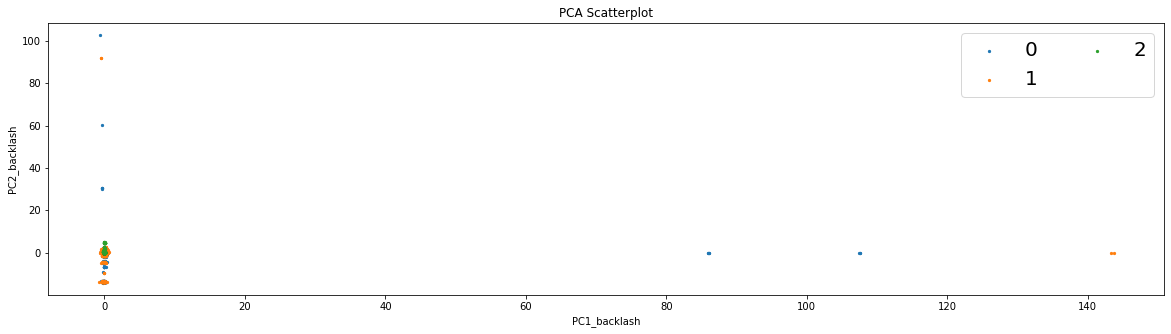

In [493]:
clusters = unique(df_model["CLUSTER"])

#using PCA
pyplot.figure(figsize = [20,5])

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(df_model["CLUSTER"] == cluster)
    # create scatter of these samples
    ledgend.append(pyplot.scatter(rand_jitter(df_model.loc[row_ix,'PC1_'+name]), rand_jitter(df_model.loc[row_ix,'PC2_'+name]),s=5))
# show the plot


plt.legend(ledgend,
           clusters,
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=20)
pyplot.title("PCA Scatterplot")
pyplot.xlabel('PC1_'+name)
pyplot.ylabel('PC2_'+name)
pyplot.show()




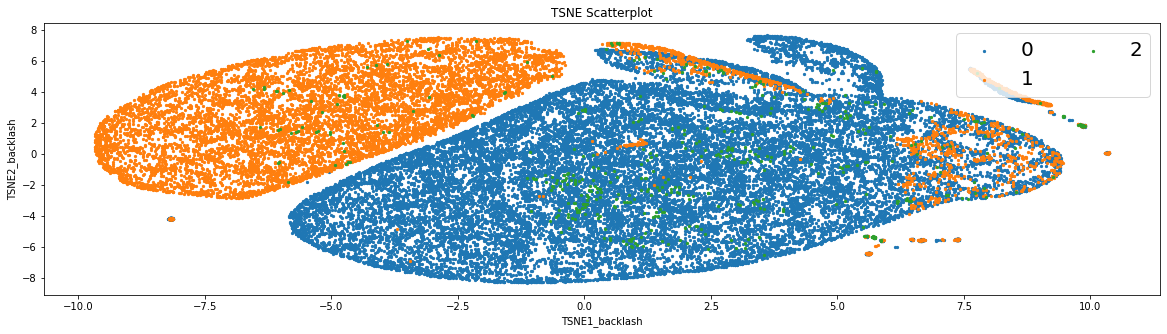

In [494]:
clusters = unique(df_model["CLUSTER"])

#using TSNE
pyplot.figure(figsize = [20,5])

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(df_model["CLUSTER"] == cluster)
    # create scatter of these samples
    ledgend.append(pyplot.scatter(rand_jitter(df_model.loc[row_ix,'TSNE1_'+name]), rand_jitter(df_model.loc[row_ix,'TSNE2_'+name]),s=5))
# show the plot


plt.legend(ledgend,
           clusters,
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=20)
pyplot.title("TSNE Scatterplot")
pyplot.xlabel('TSNE1_'+name)
pyplot.ylabel('TSNE2_'+name)
pyplot.show()

In [495]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=eval("features_"+name),  
                                class_names=y_column)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph ---Not working due to graphViz
#Image(graph.create_png())

In [496]:
print(dot_data)
#copy this to editor window on http://www.webgraphviz.com/ to create chart

digraph Tree {
node [shape=box] ;
0 [label="'Ring Gear Press Distance' <= 111.083\ngini = 0.011\nsamples = 35180\nvalue = [34979, 201]\nclass = S"] ;
1 [label="gini = 0.073\nsamples = 502\nvalue = [483, 19]\nclass = S"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="'Pinion Torque to Rotate Audit (PTR - without diff case)' <= 3.583\ngini = 0.01\nsamples = 34678\nvalue = [34496, 182]\nclass = S"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.013\nsamples = 24154\nvalue = [23993, 161]\nclass = S"] ;
2 -> 3 ;
4 [label="gini = 0.004\nsamples = 10524\nvalue = [10503, 21]\nclass = S"] ;
2 -> 4 ;
}


In [497]:
# # Create PDF
# graph.write_pdf("decision_tree.pdf")

# # Create PNG
# graph.write_png("decision_tree.png")

# Create Script for univariate and Bivariate analysis

# Logistic Regression (With and W/O WOE Transformation)

# Decision Tree

# XGBoost

# AutoML